<table style="width: 100%; border-style: none">
<tr style="border-style: none; background-color: #82a8cf">
<td style="border-style: none; width: 1%; text-align: left; font-size: 18px; color: #ffffff">Institut f&uuml;r Theoretische Physik<br /> <font color="#e6e6e6">Universit&auml;t zu K&ouml;ln </font></td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 18px; color: #ffffff">Prof. Dr. Simon Trebst<br /> <font color="#e6e6e6"> Theo Haas </font> </td>
</tr>
</table>
<hr  style="height: 2px; border-color: #606060; background-color: #606060"> 
<h1 style="font-weight:200; text-align: center; margin: 0px; font-size: 48px; padding:0px; color: #606060">Computer-Physik </h1>
<h1 style="font-weight:light; text-align: center; margin: 10px; padding:0px; color: #606060"> Schöner Plotten mit Makie &mdash; Teil 3 </h1>
<hr  style="height: 2px; border-color: #606060; background-color: #606060"> 
<h3 style="font-weight:400; text-align: center; margin: 0px; font-size: 20px; padding:0px; margin-bottom: 20px; color: #606060">Sommersemester 2025</h3>
<!--<h3 style="font-weight:bold; text-align: center; margin: 0px; font-size: 15px; padding:0px; margin-bottom: 20px;">Website: <a href="https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml" style="color:#82a8cf; text-decoration: underline;text-decoration-style: dotted;">https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml</a></h3> -->

<font size="4" color="#606060">**Website:** <a href="https://www.thp.uni-koeln.de/trebst/Lectures/2025CompPhys.shtml" style="color:#82a8cf; text-decoration: underline;text-decoration-style: dotted;">https://www.thp.uni-koeln.de/trebst/Lectures/2025-CompPhys.shtml</a></font>

<font size="4" color="#606060">**Themen dieses Notebooks**: <span style="color:#606060"> Animationen in Makie, Beispiele, Exportieren von Animationen, weiterführende Links  </span> 
    
<hr style="height:.3px"> 

# a) Animationen in Makie (Wiederholung und Vertiefung)
Was wir schon können: Animationen mit GLMakie, `Observablen` und `sleep`.

In [ ]:
using GLMakie, Colors

In [ ]:
# 1. Beispiel
fig = Figure()
ax = Axis(fig[1,1])

O = Observable(rand(20))

barplot!(ax, O)

display(fig)

In [ ]:
for i in 1:100
    O[] = rand(20)
    sleep(0.1)
end 

In [ ]:
# Beispiel 2:
nframes = 1000
fps = 40

x = Observable(collect(range(0, 1, step = 0.02)))

# Zwei Funktionen die geändert werden sollen.
y1 = lift(x) do x
    cos.(x)
end

y2 = lift(x) do x
    sin.(x)
end

fig = Figure()
ax = Axis(fig[1,1])

scatter!(ax, x, y1)
scatter!(ax, x, y2)

limits!(ax, 0, 11, -1, 1)

display(fig)


In [ ]:
for i in 1:nframes
    
    x[] = push!(x[], 1 + i * 0.01)
    
    if length(x[]) > 100
        popfirst!(x[])
    end
        
    sleep(1/fps)
     
end

Bei komplexeren Animationen, bei denen man mehrere Eigenschaften in jedem Zeitschritt ändern will, ist es eine gute Idee, alle gezeigten Daten so zu erzeugen, dass sie nur von wenigen (am besten nur einer) Observablen abhängen. Dann muss man in der "Frame"-Schleife nur diese eine Observable ändern, und alle anderen Eigenschaften ändern sich mit.

In [ ]:
time = Observable(1.)

xs = range(0, 10, length = 80)

# Zwei Funktionen die geändert werden sollen.
y1 = lift(time) do time
    return cos.(xs .- time)
end

y2 = lift(time) do time
    return sin.(xs .- time) .+ 3
end

# Linewidth der ersten Funktion soll geändert werden.
linewidth1 = lift(time) do time
    return mod(time, 10) + 3
end

# Farbe der zweiten Funktion soll geändert werden.
color2 = lift(time) do time 
    return HSV(5*time, 1, 0.75)
end

fig = Figure()
ax = Axis(fig[1,1])
lines!(ax, xs, y1, linewidth = linewidth1)
scatter!(ax, xs, y2, color = color2)

display(fig)

In [ ]:
nframes = 1000
fps = 40

for i in 1:nframes
    
    time[] = i / 20
    
    sleep(1/fps)
     
end

# 2. Animationen exportieren
Exportieren können wir die Animationen mit der Funktion `record`.

In [ ]:
?record

Dort sind z.B. die unterschiedlichen Dateiformate aufgeführt.

Beispiel von gerade, diesmal aber abspeichern.

In [ ]:
# Beispiel 1.
time = Observable(1.)

xs = range(0, 10, length = 80)

# Zwei Funktionen die geändert werden sollen.
y1 = lift(time) do time
    return cos.(xs .- time)
end

y2 = lift(time) do time
    return sin.(xs .- time) .+ 3
end

# Linewidth der ersten Funktion soll geändert werden.
linewidth1 = lift(time) do time
    return mod(time, 10) + 3
end

# Farbe der zweiten Funktion soll geändert werden.
color2 = lift(time) do time 
    return HSV(5*time, 1, 0.75)
end

fig = Figure()
ax = Axis(fig[1,1])
lines!(ax, xs, y1, linewidth = linewidth1)
scatter!(ax, xs, y2, color = color2)


# Erstmal von oben kopieren:
nframes = 500
fps = 20

record(fig, "animation1.gif", range(1, nframes), framerate = fps) do i

    time[] = i / 10
         
end

Gifs kann man im Notebook ganz einfach via Drag & Drop einfügen. 
Dazu in neue Zelle gehen, anschließend `Esc` (so dass der Rahmen blau ist), dann `M`. Das ändert die Zelle von einer Zelle, in die Julia-Code kommt, zu einer Zelle, in die man sonstigen Text, Bilder, etc. schreibt. Dann einfach gif in Zelle ziehen.

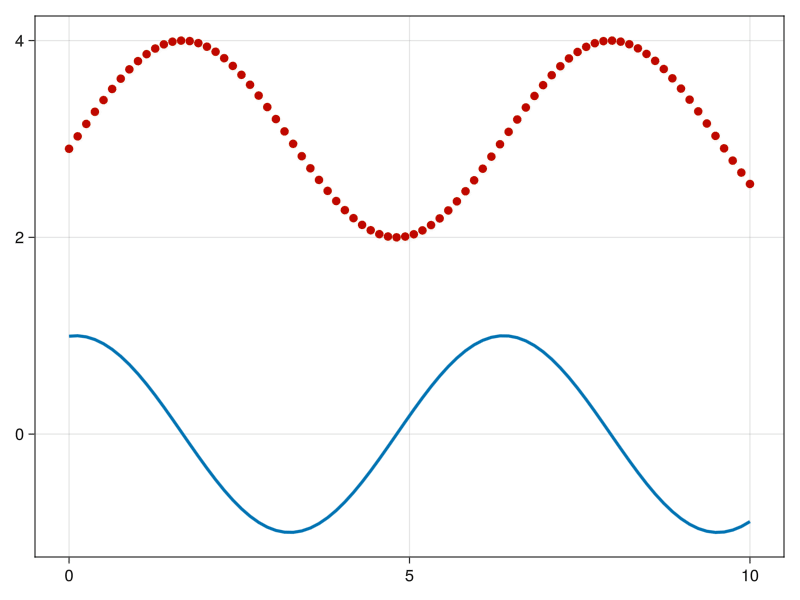

Wir können hier auch CairoMakie benutzen, da record letzendlich nur mehrere Bilder generiert und dann zu einem Video zusammenfügt.

In [ ]:
# using CairoMakie
GLMakie.activate!()
 # CairoMakie.activate!()

In [ ]:
# Beispiel 2:
f(z,c) = z^2 + c

# Funktion, die berechnet, wie viele Iterationen es dauert, bis |f(f(f(f(...f(z0)))))| > delta
function julia(z0, c, delta, imax)
    for i in 1:imax
        z0 = f(z0,c)
        (abs(f(z0,c)) > delta) && return i
    end
    return imax
end

In [ ]:
xvals = range(-1.5,1.5,length = 1024)
yvals = range(-1.5,1.5, length = 1024)

c = -0.4 + 0.6*im

time = Observable(0.)
juliaset = lift(time) do time 
    return log.([julia(x+im*y, c * exp(im * time), 2, 500) for x in xvals, y in yvals])
end

fig = Figure(backgroundcolor = :black)
ax = Axis(fig[1,1], backgroundcolor =:black)
hidedecorations!(ax)
hidespines!(ax)

hm = heatmap!(ax, juliaset, colormap = :starrynight)

display(fig)

In [ ]:
record(fig, "juliaset_animation.mp4", 0:0.01:2pi, framerate = 15) do i
    time[] = i
    hm.colormap = (:starrynight, 1-i/2pi)
end

# Weiterführende Links
- [Animationen in Makie](https://docs.makie.org/stable/documentation/animation/)